In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot, qqplot
from statsmodels.stats.api import anova_lm
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('./Data/train.csv')

In [5]:
total = train_data.isna().sum().sort_values(ascending=False)
percent = total/len(train_data)

missing = pd.concat([total, percent], axis=1)
missing.columns = ['total', 'percentage']

In [7]:
missing.iloc[:50,:]

,total,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [3]:
numerical_variables = train_data.dtypes[train_data.dtypes!='object'].index.tolist()
categorical_variables = [x for x in train_data.columns.tolist() if x not in numerical_variables]
numerical_variables.remove('Id')

In [4]:
formula = 'SalePrice ~ BedroomAbvGr + LotArea + GarageArea + GrLivArea + OverallQual + OverallCond'
lm = ols(formula, train_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     746.4
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:02:22   Log-Likelihood:                -17517.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1453   BIC:                         3.509e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.131e+04   8101.451    -11.271   

In [5]:
y_pred = lm.predict(train_data[['BedroomAbvGr','LotArea','GarageArea','GrLivArea','OverallQual','OverallCond']])

### Residual Plots 

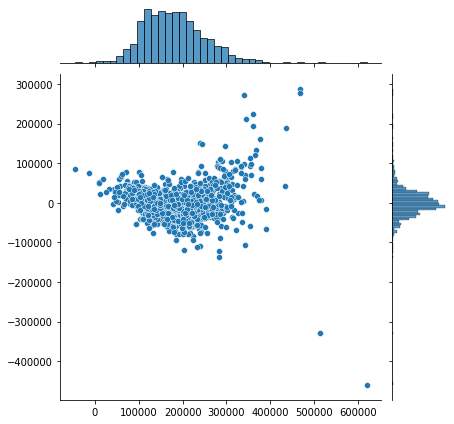

In [11]:
# fig = plt.figure(figsize=(12,8))
sns.jointplot(y=lm.resid,x=y_pred)

In [12]:
#create instance of influence
influence = lm.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

In [68]:
# residual_plots(y=standardized_residuals,x_list=y_pred)

In [66]:
def residual_plots(y,x_list):
#     x_list = pd.DataFrame(x_list)
    cols = list(x_list.columns)
    rows = int((len(x_list.columns)/3))
    height = 10*rows
    fig, axes = plt.subplots(rows, 3, figsize=(30,height), sharey=True)
    fig.text(0.04, 0.5, 'Residuals', va='center', rotation='vertical')

    for i,col_name in enumerate(cols):
        if i == len(cols):
            break
#         fig.add_subplot(ax)
        col = i%3
        row = i//3
#         axes[row][col].set(ylabel = 'Residuals')
        sns.scatterplot(y=y, x = x_list[col_name], ax=axes[row][col])

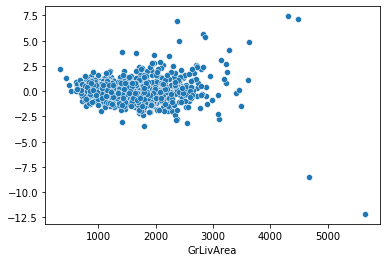

In [14]:
sns.scatterplot(y=standardized_residuals, x=train_data['GrLivArea'])

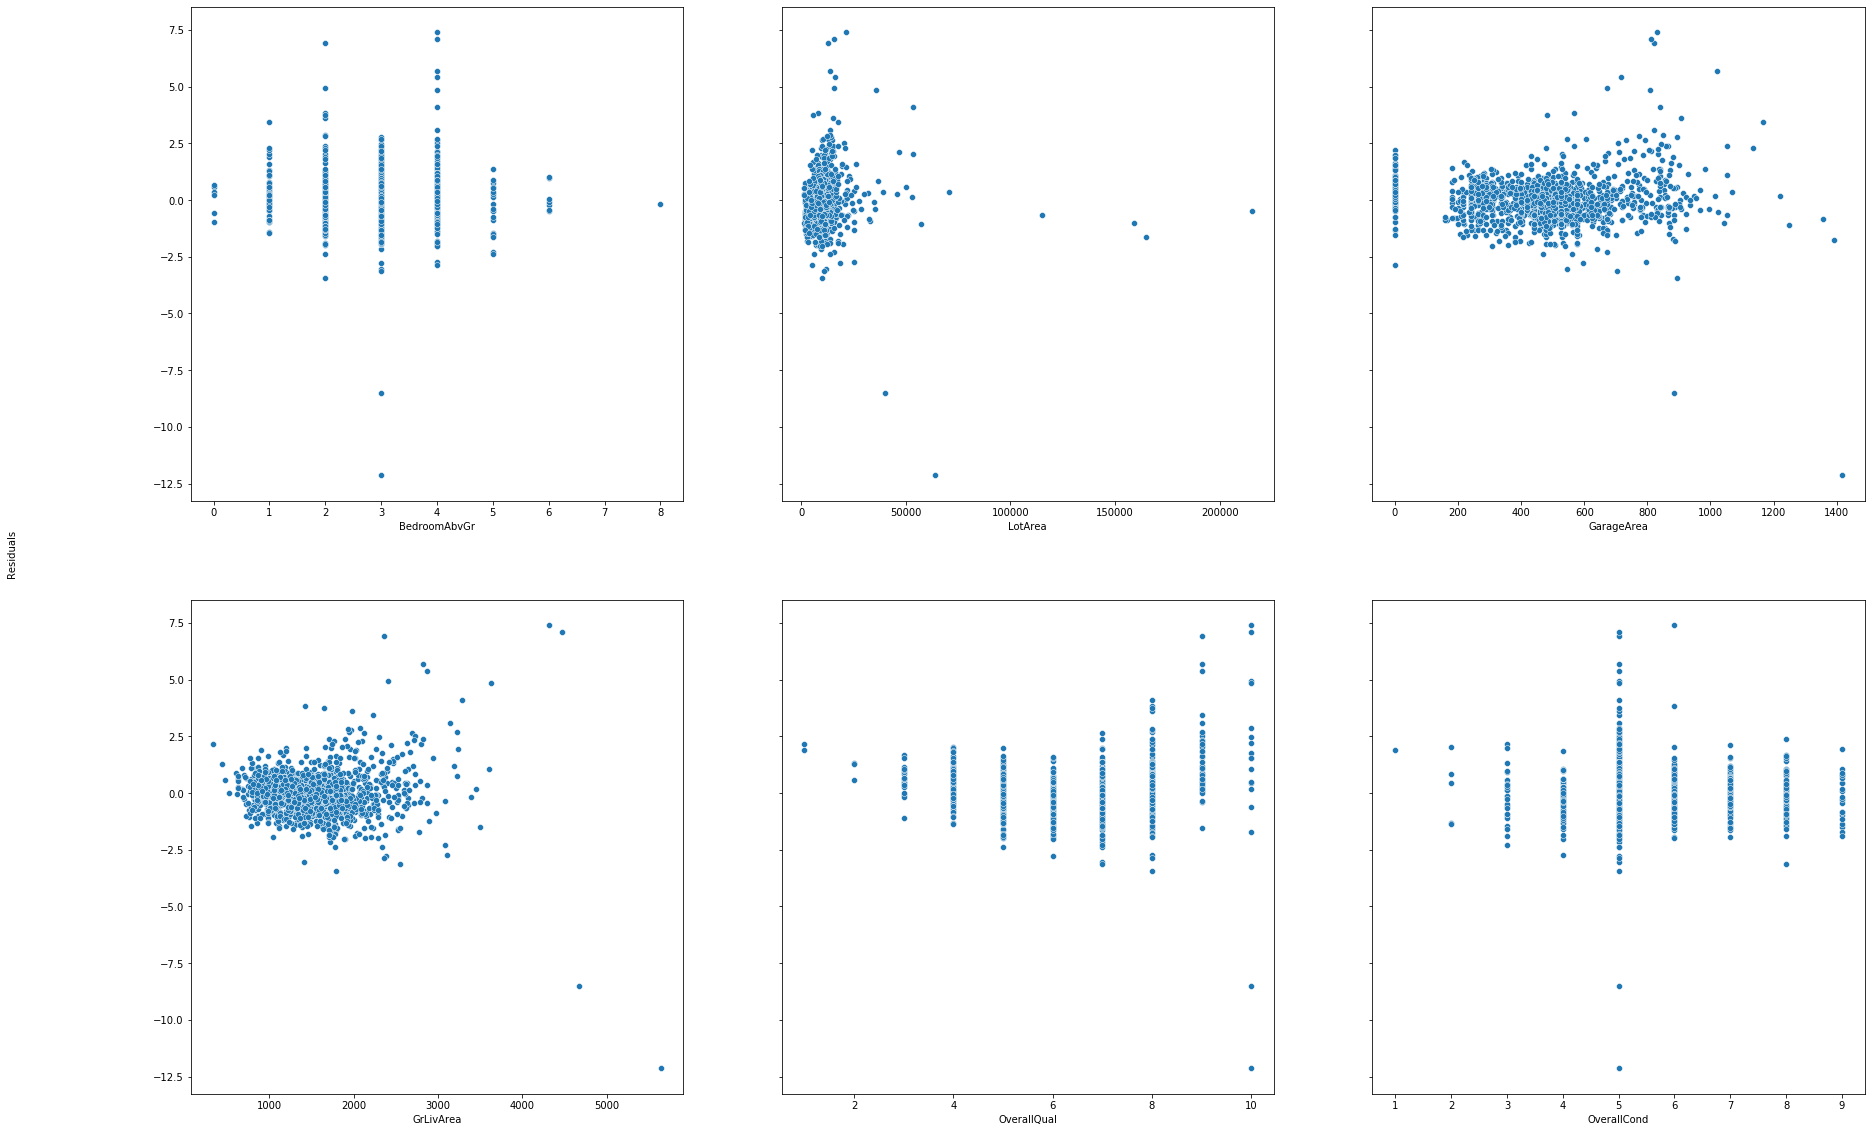

In [67]:
residual_plots(y=standardized_residuals, x_list = train_data[['BedroomAbvGr','LotArea','GarageArea','GrLivArea','OverallQual','OverallCond']])

# Normality Tests for Residuals

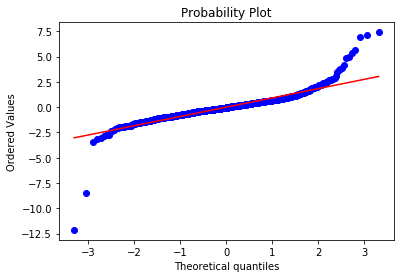

In [10]:
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.show()

In [11]:
# !pip install -U seaborn

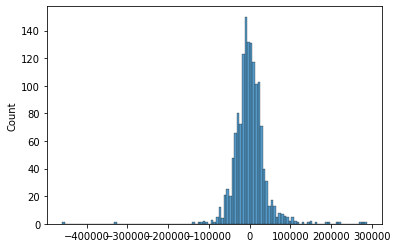

In [22]:
# fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
sns.histplot(lm.resid,ax=ax)
# ax.set_xlim(-100000,100000)
plt.show()

### Normality Test Definition

Kolmogorov-Smirnov test: This is a non-parametric test i.e., it has no assumption about the distribution of the data. Kolmogorov-Smirnov test is used to understand how well the distribution of sample data conforms to some theoretical distribution

Jarque-Bera test: This tests whether the sample has the skewness and kurtosis matching with a normal distribution, i.e., skewness=0 and kurtosis = 3

Rest all other tests are tests to check if a sample is coming from a normal distribution.

Note: Event if 1 test fails normality condition we should be suspicious, focus more on QQ Plot (if any deviation is found in QQ plot then surely there is deviation). If any other normality test fail then investigate further to see if any outlier exists

In [55]:
significance_level = 0.05
def anderson_darling(x):
    print("Anderson-Darling Test: ")
    a = stats.anderson(x)
    print("Test Statistic: ",a[0])
    if a[0]>a[1][2]:
        print("The null hypothesis can be rejected at", a[2][2],"% significance level \nIt is not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected \n It is a normal distribution")
    
    
def shapiro_wilk(x):
    print("------------------------------------------------------------------------\nShapiro-Wilk Test:")
    p_value = stats.shapiro(x)[1]
    print("P Value: ",p_value)
    if p_value<significance_level:
        print("The null hypothesis can be rejected at", significance_level*100,"% significance level \nIt is not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected \n It is a normal distribution")
        
def ks_test(x):
    print("------------------------------------------------------------------------\nKolmogorov-Smirnov Test:")
    p_value = stats.kstest(x,'norm')[1]
    print("P value: ",p_value)
    if p_value<significance_level:
        print("The null hypothesis can be rejected at", significance_level*100,"% significance level \nIt is not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected \n It is a normal distribution")
        
def agostino(x):
    print("------------------------------------------------------------------------\nD’Agostino’s K-squared Test:")
    p_value = stats.normaltest(x)[1]
    print("P value: ",p_value)
    if p_value<significance_level:
        print("The null hypothesis can be rejected at", significance_level*100,"% significance level \nIt is not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected \n It is a normal distribution")
        
def jarque_bera(x):
    print("------------------------------------------------------------------------\nJarque Bera Test:")
    p_value = stats.normaltest(x)[1]
    print("P value: ",p_value)
    if p_value<significance_level:
        print("The null hypothesis can be rejected at", significance_level*100,"% significance level \nIt is not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected \n It is a normal distribution")
        
def normality_tests(x):
    anderson_darling(x)
    shapiro_wilk(x)
    ks_test(x)
    agostino(x)
    jarque_bera(x)

In [56]:
normality_tests(lm.resid)

Anderson-Darling Test: 
Test Statistic:  29.329908499827752
The null hypothesis can be rejected at 5.0 % significance level 
It is not a normal distribution
------------------------------------------------------------------------
Shapiro-Wilk Test:
P Value:  4.600371830030132e-36
The null hypothesis can be rejected at 5.0 % significance level 
It is not a normal distribution
------------------------------------------------------------------------
Kolmogorov-Smirnov Test:
P value:  0.0
The null hypothesis can be rejected at 5.0 % significance level 
It is not a normal distribution
------------------------------------------------------------------------
D’Agostino’s K-squared Test:
P value:  1.6539953771633094e-87
The null hypothesis can be rejected at 5.0 % significance level 
It is not a normal distribution
------------------------------------------------------------------------
Jarque Bera Test:
P value:  1.6539953771633094e-87
The null hypothesis can be rejected at 5.0 % significance